In [ ]:
x = 10
print(x)

10


In [ ]:
x = 2

# Neste ponto, mudei x para 2 só para testar

* topico 1
* topico 2

$\lambda$

In [ ]:
print(x)

2


# Comandos básicos de pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/Salaries.csv')

In [ ]:
df.head(5)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [ ]:
df.shape

(397, 7)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [ ]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [ ]:
# Será que homens e mulheres tem salários diferentes?
# Forma nro 1: dividir a base em duas e fazer um describe em cada uma delas
df_homens   = df[df['sex'] == 'Male']
df_mulheres = df[df['sex'] == 'Female']

In [ ]:
df_homens.describe()

,yrs.since.phd,yrs.service,salary
count,358.000000,358.000000,358.000000
mean,22.946927,18.273743,115090.418994
std,13.036470,13.226234,30436.927344
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,92000.000000
50%,22.000000,18.000000,108043.000000
75%,33.000000,27.000000,134863.750000
max,56.000000,60.000000,231545.000000


In [ ]:
df_mulheres.describe()

,yrs.since.phd,yrs.service,salary
count,39.000000,39.000000,39.000000
mean,16.512821,11.564103,101002.410256
std,9.784176,8.813252,25952.127317
min,2.000000,0.000000,62884.000000
25%,10.000000,4.000000,77250.000000
50%,17.000000,10.000000,103750.000000
75%,23.500000,17.500000,117002.500000
max,39.000000,36.000000,161101.000000


In [ ]:
df_homens['salary'].mean()

115090.41899441341

In [ ]:
df_mulheres['salary'].mean()

101002.41025641025

In [ ]:
# median, mode, std, 
df_homens['discipline'].mode()

0    B
dtype: object

In [ ]:
df_mulheres['discipline'].mode()

0    B
dtype: object

In [ ]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [ ]:
df.groupby('sex').describe().T

sex                         Female           Male
yrs.since.phd count      39.000000     358.000000
              mean       16.512821      22.946927
              std         9.784176      13.036470
              min         2.000000       1.000000
              25%        10.000000      12.000000
              50%        17.000000      22.000000
              75%        23.500000      33.000000
              max        39.000000      56.000000
yrs.service   count      39.000000     358.000000
              mean       11.564103      18.273743
              std         8.813252      13.226234
              min         0.000000       0.000000
              25%         4.000000       7.000000
              50%        10.000000      18.000000
              75%        17.500000      27.000000
              max        36.000000      60.000000
salary        count      39.000000     358.000000
              mean   101002.410256  115090.418994
              std     25952.127317   30436.927344
              min     62884.000000   57800.000000
              25%     77250.000000   92000.000000
              50%    103750.000000  108043.000000
              75%    117002.500000  134863.750000
              max    161101.000000  231545.000000

In [ ]:
df.groupby(['rank', 'sex']).describe().T

rank                     AssocProf                     AsstProf                \
sex                         Female           Male        Female          Male   
yrs.since.phd count      10.000000      54.000000     11.000000     56.000000   
              mean       15.500000      15.444444      5.636364      5.000000   
              std         5.797509      10.249099      2.975659      2.464290   
              min        10.000000       6.000000      2.000000      1.000000   
              25%        12.000000       9.250000      3.500000      3.750000   
              50%        13.000000      11.500000      5.000000      4.000000   
              75%        17.750000      17.000000      7.500000      7.000000   
              max        26.000000      49.000000     11.000000     11.000000   
yrs.service   count      10.000000      54.000000     11.000000     56.000000   
              mean       11.500000      12.037037      2.545455      2.339286   
              std         6.258328      10.703487      1.863525      1.430534   
              min         6.000000       1.000000      0.000000      0.000000   
              25%         8.000000       7.000000      1.500000      1.000000   
              50%         9.500000       8.000000      3.000000      3.000000   
              75%        10.750000      11.000000      3.000000      3.000000   
              max        24.000000      53.000000      6.000000      5.000000   
salary        count      10.000000      54.000000     11.000000     56.000000   
              mean    88512.800000   94869.703704  78049.909091  81311.464286   
              std     17965.286006   12890.817423   9371.996121   7901.342712   
              min     62884.000000   70000.000000  63100.000000  63900.000000   
              25%     73682.500000   83213.250000  73000.000000  74375.000000   
              50%     90556.500000   95626.500000  77000.000000  80182.000000   
              75%    103933.000000  104630.250000  79362.500000  88802.500000   
              max    109650.000000  126431.000000  97032.000000  95079.000000   

rank                          Prof                 
sex                         Female           Male  
yrs.since.phd count      18.000000     248.000000  
              mean       23.722222      28.633065  
              std         7.668158      10.195579  
              min        12.000000      11.000000  
              25%        17.250000      20.000000  
              50%        23.000000      28.000000  
              75%        28.000000      37.000000  
              max        39.000000      56.000000  
yrs.service   count      18.000000     248.000000  
              mean       17.111111      23.229839  
              std         8.101481      11.707622  
              min         0.000000       2.000000  
              25%        14.000000      15.000000  
              50%        17.000000      22.000000  
              75%        19.000000      31.000000  
              max        36.000000      60.000000  
salary        count      18.000000     248.000000  
              mean   121967.611111  127120.822581  
              std     19619.582577   28213.807675  
              min     90450.000000   57800.000000  
              25%    109723.000000  105834.500000  
              50%    120257.500000  123996.000000  
              75%    135000.000000  145512.500000  
              max    161101.000000  231545.000000

In [ ]:
df['yrs.since.phd'].describe()

count    397.000000
mean      22.314861
std       12.887003
min        1.000000
25%       12.000000
50%       21.000000
75%       32.000000
max       56.000000
Name: yrs.since.phd, dtype: float64

In [ ]:
faixas = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
df['fx_tempo_doutorado'] = pd.cut(df['yrs.since.phd'], faixas)

In [ ]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,fx_tempo_doutorado
0,Prof,B,19,18,Male,139750,"(15, 20]"
1,Prof,B,20,16,Male,173200,"(15, 20]"
2,AsstProf,B,4,3,Male,79750,"(0, 5]"
3,Prof,B,45,39,Male,115000,"(40, 45]"
4,Prof,B,40,41,Male,141500,"(35, 40]"


In [ ]:
df['fx_tempo_doutorado'].value_counts()

(15, 20]    54
(10, 15]    52
(25, 30]    47
(20, 25]    46
(5, 10]     45
(0, 5]      42
(35, 40]    41
(30, 35]    35
(40, 45]    20
(45, 50]    10
(50, 55]     3
(55, 60]     2
Name: fx_tempo_doutorado, dtype: int64

In [ ]:
df.groupby('fx_tempo_doutorado').describe().T

fx_tempo_doutorado         (0, 5]        (5, 10]       (10, 15]  \
yrs.since.phd count     42.000000      45.000000      52.000000   
              mean       3.428571       8.244444      12.903846   
              std        1.171675       1.316945       1.375694   
              min        1.000000       6.000000      11.000000   
              25%        3.000000       7.000000      12.000000   
              50%        4.000000       8.000000      13.000000   
              75%        4.000000       9.000000      14.000000   
              max        5.000000      10.000000      15.000000   
yrs.service   count     42.000000      45.000000      52.000000   
              mean       1.928571       5.222222       8.442308   
              std        1.438035       2.485310       3.701687   
              min        0.000000       1.000000       0.000000   
              25%        1.000000       3.000000       7.000000   
              50%        2.000000       5.000000       9.000000   
              75%        3.000000       7.000000      11.000000   
              max        5.000000      10.000000      18.000000   
salary        count     42.000000      45.000000      52.000000   
              mean   81695.000000   87459.622222  106745.288462   
              std     8626.345446   12310.308944   19161.581253   
              min    63900.000000   63100.000000   71065.000000   
              25%    73625.000000   77081.000000   98326.500000   
              50%    80225.000000   86373.000000  106690.500000   
              75%    89942.000000   97032.000000  118342.250000   
              max    95079.000000  113600.000000  146000.000000   

fx_tempo_doutorado        (15, 20]       (20, 25]       (25, 30]  \
yrs.since.phd count      54.000000      46.000000      47.000000   
              mean       18.203704      22.847826      28.127660   
              std         1.419269       1.444797       1.278876   
              min        16.000000      21.000000      26.000000   
              25%        17.000000      22.000000      27.000000   
              50%        18.000000      23.000000      28.000000   
              75%        19.000000      24.000000      29.000000   
              max        20.000000      25.000000      30.000000   
yrs.service   count      54.000000      46.000000      47.000000   
              mean       13.388889      17.043478      22.276596   
              std         5.451040       6.210946       6.070965   
              min         2.000000       2.000000       7.000000   
              25%         9.250000      15.000000      19.000000   
              50%        15.500000      19.000000      23.000000   
              75%        18.000000      21.750000      27.000000   
              max        23.000000      25.000000      36.000000   
salary        count      54.000000      46.000000      47.000000   
              mean   120196.481481  126099.586957  128993.212766   
              std     24147.992332   27076.451059   30887.300658   
              min     81285.000000   62884.000000   73300.000000   
              25%    104606.500000  105991.000000  105825.000000   
              50%    121050.000000  119110.500000  126621.000000   
              75%    135445.500000  146175.000000  150250.000000   
              max    173200.000000  181257.000000  204000.000000   

fx_tempo_doutorado        (30, 35]       (35, 40]       (40, 45]  \
yrs.since.phd count      35.000000      41.000000      20.000000   
              mean       32.800000      38.146341      43.050000   
              std         1.530090       1.275950       1.538112   
              min        31.000000      36.000000      41.000000   
              25%        31.000000      37.000000      42.000000   
              50%        33.000000      38.000000      43.000000   
              75%        34.000000      39.000000      45.000000   
              max        35.000000      40.000000      45.000000   
yrs.service

In [ ]:
df.groupby('fx_tempo_doutorado').agg({'salary':['count','mean','min','max']}).style.format()

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ans/dataset0.csv')

In [ ]:
df.head(5)

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


In [ ]:
df.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

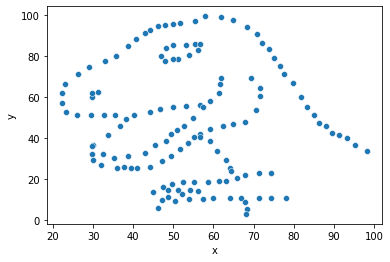

In [ ]:
import seaborn as sns
sns.scatterplot(df['x'], df['y'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


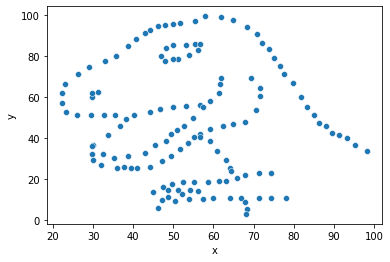

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


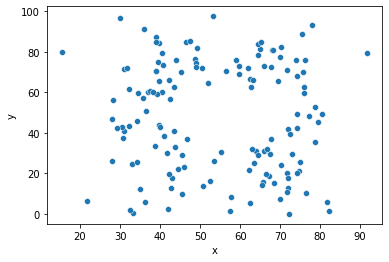

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


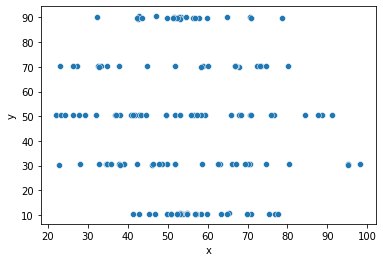

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


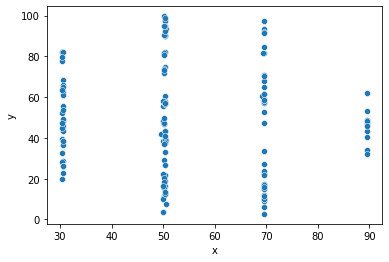

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


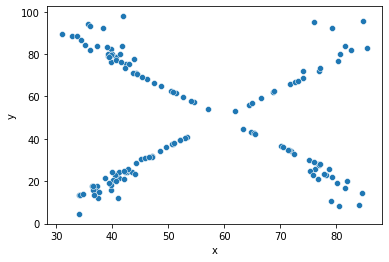

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


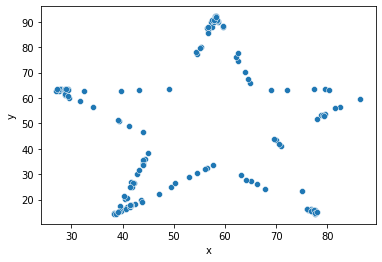

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


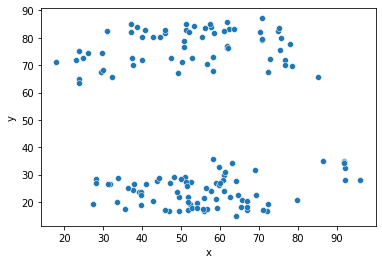

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


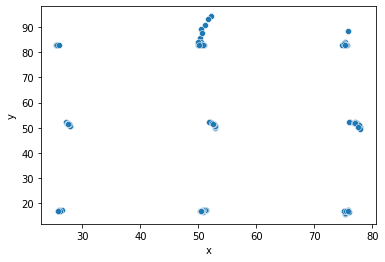

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


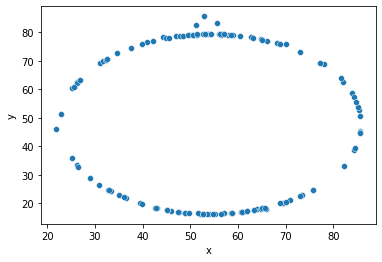

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


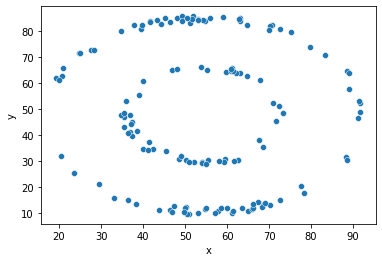

In [ ]:
import matplotlib.pyplot as plt
for i in range(0, 10):
  df = pd.read_csv(f'https://jpbarddal.github.io/assets/data/datascience/ans/dataset{i}.csv')
  sns.scatterplot(df['x'], df['y'])
  plt.show()

# Análise univariada

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ommlbd_familiar.csv')

In [ ]:
df.head(3)

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
0,23325,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,667198,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,116666,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [ ]:
# substituir os -9999 por campos em branco
df.replace(-9999, np.nan, inplace=True)

In [ ]:
df.head(3)

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
0,23325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438924 entries, 0 to 438923
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HS_CPF                   438924 non-null  int64  
 1   QTDPESSOASCASA           165520 non-null  float64
 2   MENORRENDACASA           165520 non-null  float64
 3   MAIORRENDACASA           165520 non-null  float64
 4   SOMARENDACASA            165520 non-null  float64
 5   MEDIARENDACASA           165520 non-null  float64
 6   MAIORIDADECASA           165472 non-null  float64
 7   MENORIDADECASA           165472 non-null  float64
 8   MEDIAIDADECASA           165472 non-null  float64
 9   INDICMENORDEIDADE        165520 non-null  float64
 10  COBRANCABAIXOCASA        165520 non-null  float64
 11  COBRANCAMEDIOCASA        165520 non-null  float64
 12  COBRANCAALTACASA         165520 non-null  float64
 13  SEGMENTACAOFINBAIXACASA  165520 non-null  float64
 14  SEGM

In [ ]:
# percentual de faltantes
df.isna().sum() / len(df)

HS_CPF                     0.000000
QTDPESSOASCASA             0.622896
MENORRENDACASA             0.622896
MAIORRENDACASA             0.622896
SOMARENDACASA              0.622896
MEDIARENDACASA             0.622896
MAIORIDADECASA             0.623005
MENORIDADECASA             0.623005
MEDIAIDADECASA             0.623005
INDICMENORDEIDADE          0.622896
COBRANCABAIXOCASA          0.622896
COBRANCAMEDIOCASA          0.622896
COBRANCAALTACASA           0.622896
SEGMENTACAOFINBAIXACASA    0.622896
SEGMENTACAOFINMEDIACASA    0.622896
SEGMENTACAOALTACASA        0.622896
BOLSAFAMILIACASA           0.622896
FUNCIONARIOPUBLICOCASA     0.622896
dtype: float64

In [ ]:
df.describe()

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
count,438924.000000,165520.000000,165520.000000,165520.000000,165520.000000,165520.000000,165472.000000,165472.000000,165472.000000,165520.000000,165520.000000,165520.000000,165520.000000,165520.000000,165520.000000,165520.000000,165520.000000,165520.000000
mean,324130.294748,2.993542,1211.068753,5259.854398,8306.661431,2902.041409,50.904298,24.809690,36.196613,0.064669,0.059981,0.005486,0.003160,0.063575,0.001172,0.000085,0.206803,0.197499
std,205825.214515,1.231989,1438.357620,6079.701542,8445.786665,2984.834142,13.807128,10.886317,10.893769,0.245941,0.237452,0.073863,0.056123,0.243996,0.034215,0.009196,0.405014,0.398113
min,0.000000,2.000000,400.000000,400.000000,800.000000,400.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147907.750000,2.000000,800.000000,1200.000000,2900.000000,1000.000000,42.000000,18.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,294081.500000,3.000000,900.000000,3000.000000,5400.000000,1800.000000,49.000000,23.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,515903.250000,4.000000,1000.000000,7000.000000,10300.000000,3533.000000,58.000000,30.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,698720.000000,10.000000,30000.000000,30000.000000,100000.000000,30000.000000,128.000000,103.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

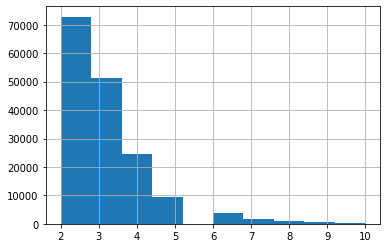

In [ ]:
# Histograma
df['QTDPESSOASCASA'].hist()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QTDPESSOASCASA'>

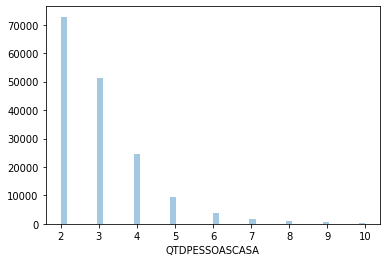

In [ ]:
sns.distplot(df['QTDPESSOASCASA'], kde=False)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='QTDPESSOASCASA'>

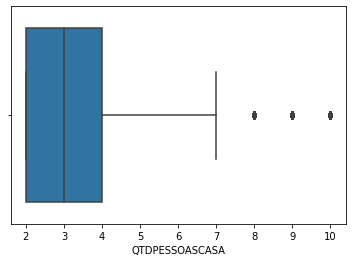

In [ ]:
sns.boxplot(df['QTDPESSOASCASA'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='QTDPESSOASCASA'>

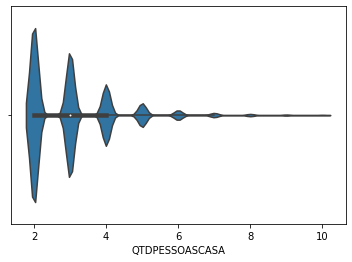

In [ ]:
sns.violinplot(df['QTDPESSOASCASA'])

<AxesSubplot:>

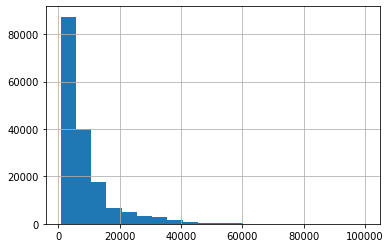

In [ ]:
# histograma de soma das rendas de cada casa
df['SOMARENDACASA'].hist(bins=20)

<AxesSubplot:>

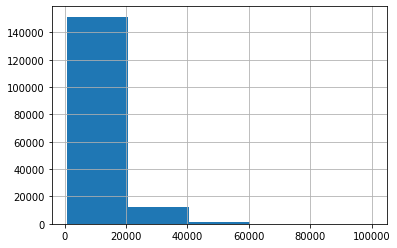

In [ ]:
df['SOMARENDACASA'].hist(bins=5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOMARENDACASA'>

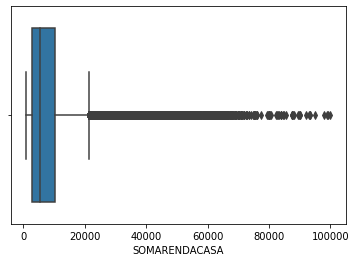

In [ ]:
sns.boxplot(df['SOMARENDACASA'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOMARENDACASA'>

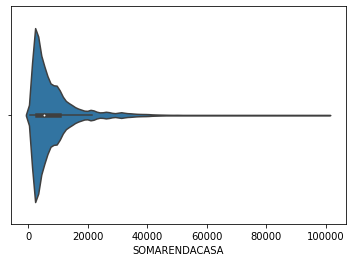

In [ ]:
sns.violinplot(df['SOMARENDACASA'])

In [ ]:
# PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
# box-cox ou yeo-johnson
# box-cox (só funciona com dados positivos)
# yeo-johnson (funciona com dados negativos ou nulos - zero)
pt = PowerTransformer(method='yeo-johnson')

<AxesSubplot:>

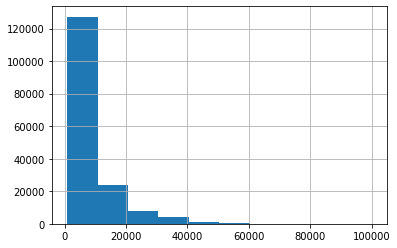

In [ ]:
df['SOMARENDACASA'].hist()

In [ ]:
# aplicar o yeo-johnson na base toda
df_transformado = pd.DataFrame(data=pt.fit_transform(df), columns=df.columns.values)
df_transformado

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
0,-1.794091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.453692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.961206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.876386,-1.043463,0.249848,-1.008200,-1.167411,-0.764900,0.320592,0.483667,0.566459,-0.262945,-0.252602,-0.07427,-0.056301,-0.26056,-0.034255,-0.009197,-0.510608,-0.496089
4,1.500888,1.509392,-1.902911,-0.820794,-0.245807,-1.148072,-0.515051,-0.788916,-1.102295,3.803075,-0.252602,-0.07427,-0.056301,-0.26056,-0.034255,-0.009197,1.958449,2.015768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438919,-1.385161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438920,-0.402030,-1.043463,0.050876,0.707877,0.296364,0.773425,-0.947964,1.195548,0.308727,-0.262945,-0.252602,-0.07427,-0.056301,-0.26056,-0.034255,-0.009197,-0.510608,-0.496089
438921,-1.771316,-1.043463,1.590918,1.854844,1.723038,1.947155,0.852170,1.121117,1.172623,-0.262945,-0.252602,-0.07427,-0.056301,-0.26056,-0.034255,-0.009197,-0.510608,-0.496089
438922,-1.479928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

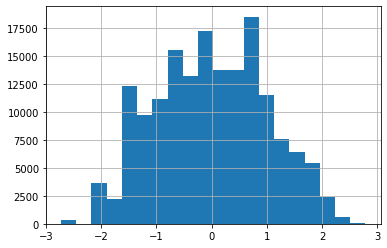

In [ ]:
df_transformado['SOMARENDACASA'].hist(bins=20)

In [ ]:
# desfazendo a transformacao
pt.inverse_transform(df_transformado)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


array([[2.33250e+04,         nan,         nan, ...,         nan,
                nan,         nan],
       [6.67198e+05,         nan,         nan, ...,         nan,
                nan,         nan],
       [1.16666e+05,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [2.50540e+04, 2.00000e+00, 2.50000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.15130e+04,         nan,         nan, ...,         nan,
                nan,         nan],
       [6.16002e+05, 2.00000e+00, 3.00000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

# Análise multivariada

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating the dataframe
df = pd.DataFrame({
    'x' : np.random.normal(10, 1.2, 20000),
    'y' : np.random.normal(10, 1.2, 20000),
    'group' : np.repeat('A', 20000)
})

tmp1 = pd.DataFrame({
    'x' : np.random.normal(14.5, 1.2, 20000),
    'y' : np.random.normal(14.5, 1.2, 20000),
    'group' : np.repeat('B', 20000)
})

tmp2 = pd.DataFrame({
    'x' : np.random.normal(9.5, 1.5, 20000),
    'y' : np.random.normal(15.5, 1.5, 20000),
    'group' : np.repeat('C', 20000)
})

# concatenating the data
df = df.append(tmp1).append(tmp2)

<ipython-input-2-0d9cde1ec7dd>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp1).append(tmp2)


In [ ]:
df.head(5)

,x,y,group
0,11.760801,9.313606,A
1,10.137946,12.262613,A
2,9.535633,11.541974,A
3,10.985459,9.649613,A
4,9.707162,10.091015,A


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


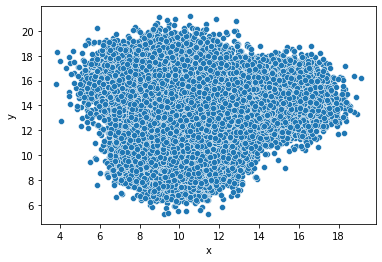

In [ ]:
# scatter plot
sns.scatterplot(df['x'], df['y'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


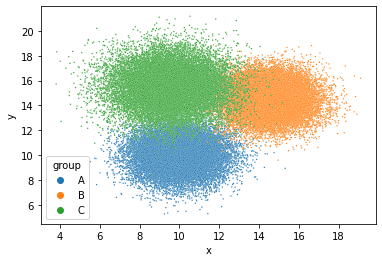

In [ ]:
# scatter plot
sns.scatterplot(df['x'], df['y'], s=2, hue=df['group'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


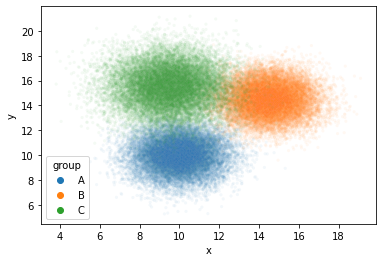

In [ ]:
# scatter plot
sns.scatterplot(df['x'], df['y'], s=10, alpha=0.05, hue=df['group'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

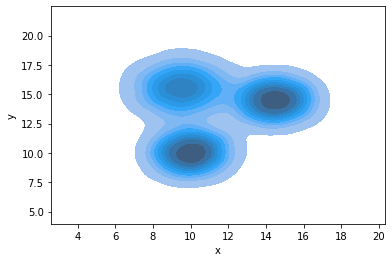

In [ ]:
df.reset_index(drop=True, inplace=True)
# sns.kdeplot(data=df, x='x', y='y')
sns.kdeplot(df['x'], df['y'], shade=True)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


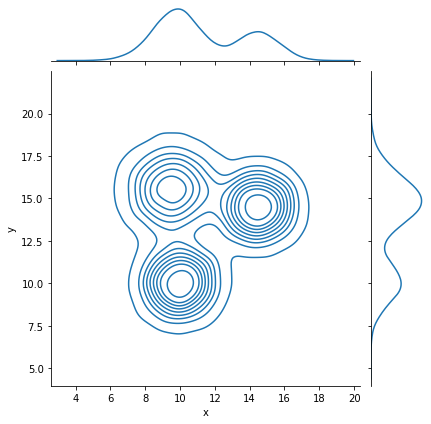

In [ ]:
sns.jointplot(df['x'], df['y'], kind='kde') #), s=5)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

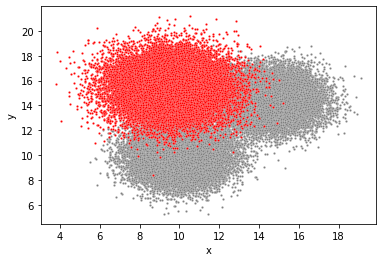

In [ ]:
# dar enfase a um grupo em particular
#sns.scatterplot(df['x'], df['y'], hue=df['group'])
df_grupo_c = df[df['group'] == 'C']
df_demais_grupos = df[df['group'] != 'C']

sns.scatterplot(df_demais_grupos['x'], df_demais_grupos['y'], color='grey', s=5)
# plt.show()
sns.scatterplot(df_grupo_c['x'], df_grupo_c['y'], color='red', s=5)
# plt.show()

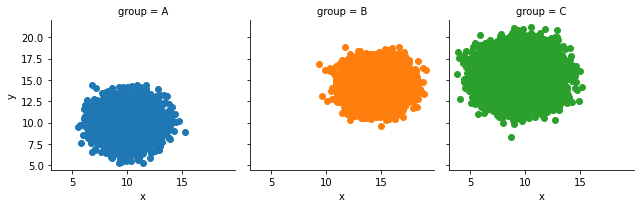

In [ ]:
# Facetas
g = sns.FacetGrid(df, col='group', hue='group')
g = (g.map(plt.scatter, 'x', 'y'))
plt.show()

In [ ]:
# create a new dataset
a = np.concatenate([
                    np.random.normal(2, 4, 1000),
                    np.random.normal(4, 4, 1000),
                    np.random.normal(1, 2,  500),
                    np.random.normal(10, 2, 500),
                    np.random.normal(8, 4, 1000),
                    np.random.normal(10, 4, 1000)                                    
])

df = pd.DataFrame({
    'x': np.repeat(range(1,6), 1000),
    'y': a
})

df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(5)

,x,y
0,1,-2.006916
1,1,1.266943
2,1,0.394941
3,1,5.749209
4,1,0.785336


In [ ]:
df.dtypes

x      int64
y    float64
dtype: object

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

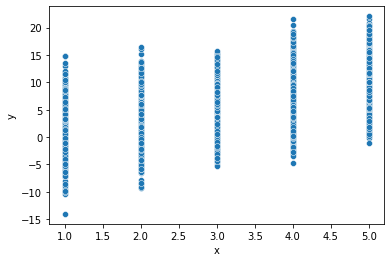

In [ ]:
sns.scatterplot(df['x'], df['y'])

In [ ]:
df['x'].unique()

array([1, 2, 3, 4, 5])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

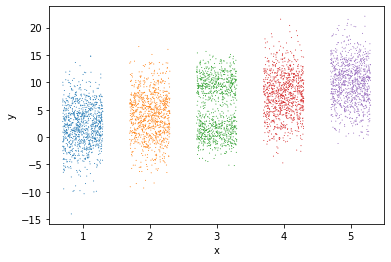

In [ ]:
sns.stripplot(df['x'], df['y'], s=1, jitter=0.3)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

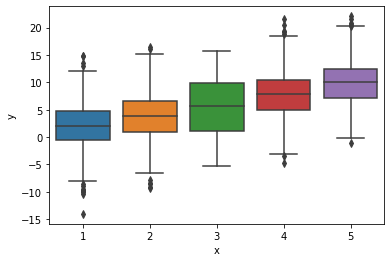

In [ ]:
sns.boxplot(df['x'], df['y'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

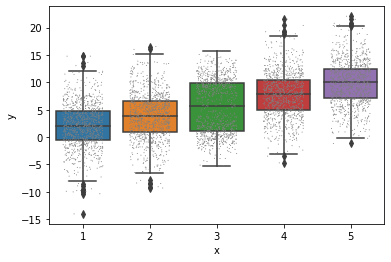

In [ ]:
# new_vals = df['x'] - 1
# sns.boxplot(new_vals, df['y'])

sns.boxplot(np.subtract(df['x'],1),df['y'])
sns.stripplot(df['x'], df['y'], s=1, jitter=0.3, color='grey')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

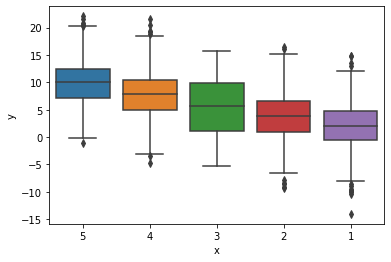

In [ ]:
medianas = df.groupby('x').median()
# medianas
indices = medianas.sort_values('y', ascending=False).index
sns.boxplot(df['x'],df['y'], order=indices)

## Atividade

In [ ]:
df = pd.read_csv('https://www.dropbox.com/s/m1e44xinrkn99qq/kobe_shots.csv?dl=1')

In [ ]:
df.head(3)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3


In [ ]:
# 1- Tentem estabelecer uma pergunta ou uma hipótese.
# ex.: Questão: será que os arremessos mais próximos da cesta são normalmente mais convertidos?
# ex.: Hipótese: O percentual de acertos de arremessos do lado esquerdo 
#                da quadra é maior do que do lado direito
#      Validar ou Refutar a hipótese

# 2- Usem estatísticas e gráficos para tentar responder a questão ou validar/refutar a hipótese

# 3- Adicionem um texto que explica as estatísticas e os gráficos com o 
#    objetivo de explicar o que foi feito e os resultados para outra pessoa


# Correlações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/meses_producao_custo.csv')

In [ ]:
df

,Meses,litros,custo
0,Jan,20200,19000
1,Fev,16700,17000
2,Mar,14800,14000
3,Abr,16000,15000
4,Mai,12100,14000
5,Jun,13000,15000
6,Jul,11600,13000
7,Ago,15500,16000
8,Set,18900,18000
9,Out,20000,19000


<Axes: xlabel='litros', ylabel='custo'>

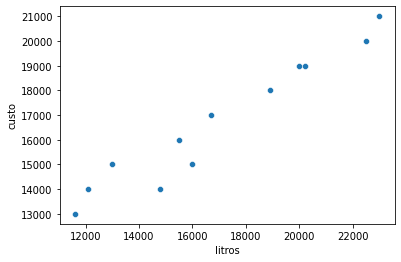

In [ ]:
# grafico de dispersao (scatterplot)
sns.scatterplot(x=df['litros'], y=df['custo'])

<Axes: xlabel='litros', ylabel='custo'>

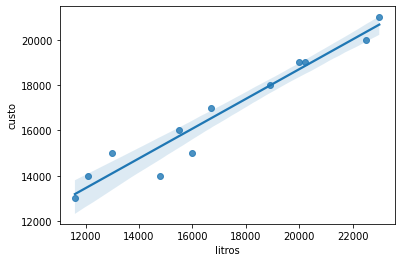

In [ ]:
# scatterplot + adicionar linha de tendencia
sns.regplot(x=df['litros'], y=df['custo'])

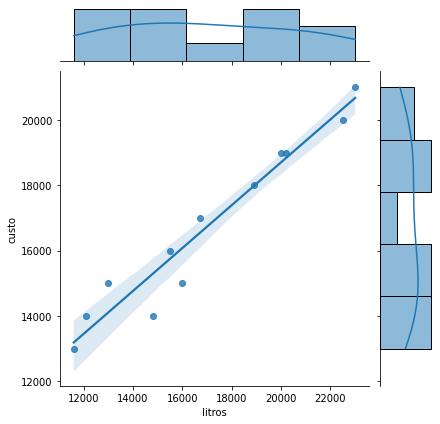

In [ ]:
sns.jointplot(x=df['litros'], y=df['custo'], kind='reg')

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(df['custo'], df['litros'])

PearsonRResult(statistic=0.9699933926497075, pvalue=1.8217575079740613e-07)

Text(12000, 21000, 'pearson = 0.97')

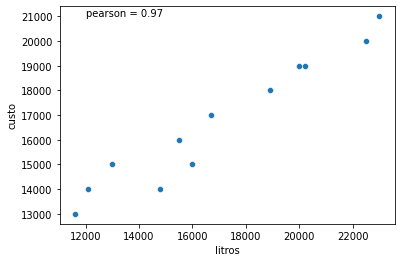

In [ ]:
graph = sns.scatterplot(x=df['litros'], y=df['custo'])
r, _ = pearsonr(df['custo'], df['litros'])
plt.text(12000,21000, f'pearson = {r:.2f}')

In [ ]:
# calculando a correlacao entre todas as variaveis numericas do dataset
df.corr()

,litros,custo
litros,1.000000,0.969993
custo,0.969993,1.000000


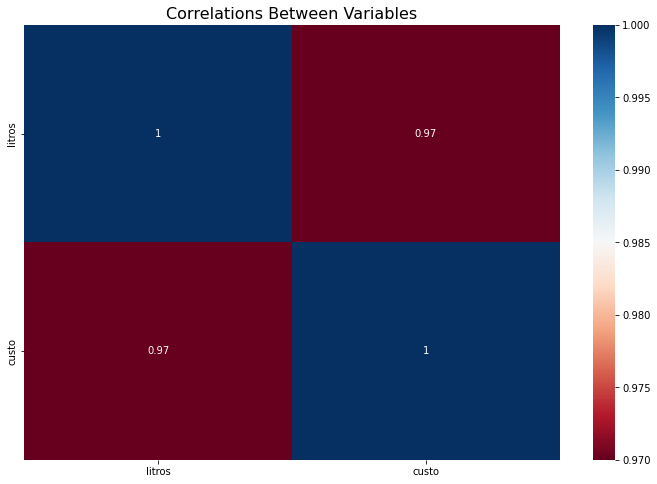

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

### Casos onde Pearson falha

Text(0, 1, 'r = -0.00')

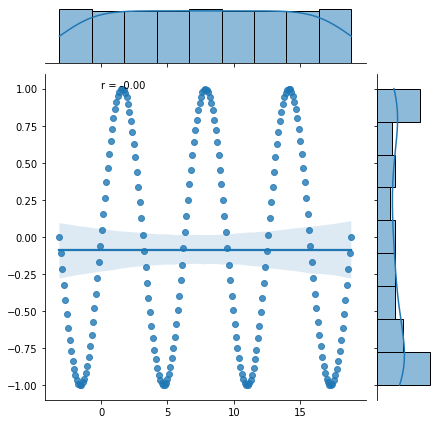

In [ ]:
x = np.linspace(-np.pi, 6 * np.pi, 201)
y = np.sin(x)

sns.jointplot(x=x, y=y, kind='reg')
r, _ = pearsonr(x,y)
plt.text(0,1, f'r = {r:.2f}')

In [ ]:
from scipy.stats import spearmanr
r, _ = spearmanr(x,y)
r

-0.0001433432220462791

In [ ]:
df.corr(method='spearman')

,litros,custo
litros,1.000000,0.970137
custo,0.970137,1.000000


# Análise de relações de dados categóricos usando o Titanic

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/titanic.csv')

In [ ]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


<Axes: xlabel='Embarked', ylabel='Pclass'>

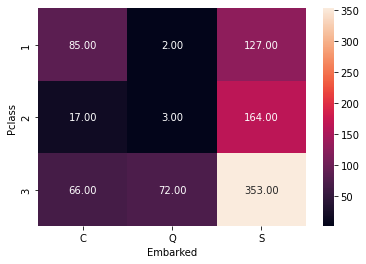

In [ ]:
# Analisar classe versus porto de embarque
ctab = pd.crosstab(df['Pclass'], df['Embarked'])
sns.heatmap(ctab, annot=True, fmt='.2f')

<Axes: xlabel='Embarked', ylabel='Pclass'>

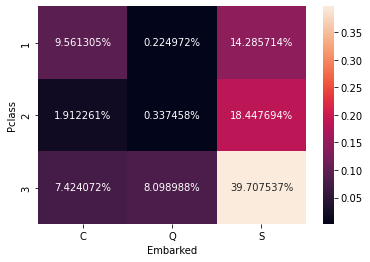

In [ ]:
# Analisar classe versus porto de embarque
ctab = pd.crosstab(df['Pclass'], df['Embarked'], normalize='all')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Embarked', ylabel='Pclass'>

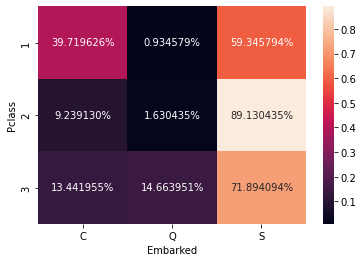

In [ ]:
# Analisar classe versus porto de embarque
ctab = pd.crosstab(df['Pclass'], df['Embarked'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Embarked', ylabel='Pclass'>

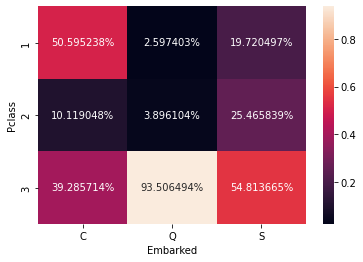

In [ ]:
# Analisar classe versus porto de embarque
ctab = pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%')

# Analisando sexo e sobrevivencia

<Axes: xlabel='Survived', ylabel='Sex'>

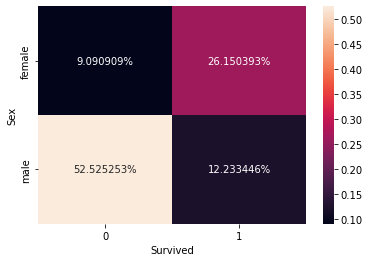

In [ ]:
# Analisar classe versus porto de embarque
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='all')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Sex'>

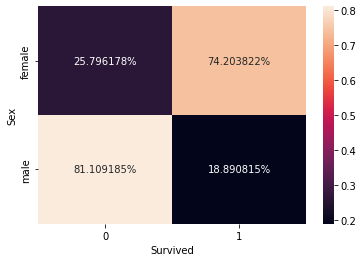

In [ ]:
# Analisar classe versus porto de embarque
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Sex'>

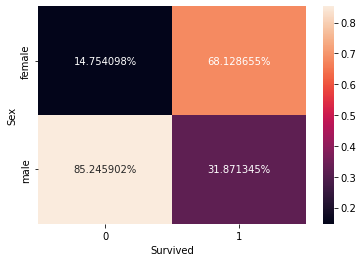

In [ ]:
# Analisar classe versus porto de embarque
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%')